# External Dependencies of Java Artifacts with Neo4j
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from py2neo import Graph

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.
graph = Graph("bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename):
    return graph.run(get_cypher_query_from_file(filename)).to_data_frame()

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## External Package Usage

### External Package

A package is categorized as "external" if it is utilized as a dependency, or if any of its enclosed types are used as dependencies, but the code within it has not been analyzed (missing bytecode). This also applies to all build-in Java types, but they are explicitly filtered out here.

### External annotation dependency

The aforementioned classification encompasses external annotation dependencies as well. These dependencies introduce significantly less coupling and are not indispensable for compiling code. Without the external annotation the code would most probably behave differently. Hence, they are included in the first more overall and general tables and then left out in the later more specific ones.

### Table 1 - Top 20 most used external packages overall

- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCaller* refers to the distinct types that make use of the external package
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package
- *allTypes* represents the total count of all analyzed types in general
- *externalTypeNames* contains a list of actually utilized types of the external package

In [8]:
external_package_useage=query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_overall.cypher")

# Select columns and only show the first 20 entries (head)
external_package_useage.head(20)

,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,allTypes,externalTypeNames
0,javax.annotation,323,1404,2493,"[Nonnull, Nullable, PreDestroy]"
1,org.slf4j,190,529,2493,"[Logger, LoggerFactory]"
2,javax.persistence,78,339,2493,"[IdClass, MappedSuperclass, Id, Table, Index, ..."
3,jakarta.persistence,69,327,2493,"[MappedSuperclass, IdClass, Id, EntityExistsEx..."
4,org.hamcrest,59,490,2493,"[Matcher, StringDescription, CoreMatchers, Des..."
5,com.fasterxml.jackson.annotation,54,84,2493,"[JsonProperty, JsonGetter, JsonTypeInfo$Id, Js..."
6,org.quartz,37,226,2493,"[JobDataMap, JobDetail, JobExecutionException,..."
7,reactor.core.publisher,33,149,2493,"[Mono, Flux, FluxSink$OverflowStrategy, FluxSi..."
8,com.fasterxml.jackson.databind,15,73,2493,"[JsonDeserializer, DeserializationContext, Obj..."
9,org.reactivestreams,13,41,2493,[Publisher]


<Figure size 640x480 with 0 Axes>

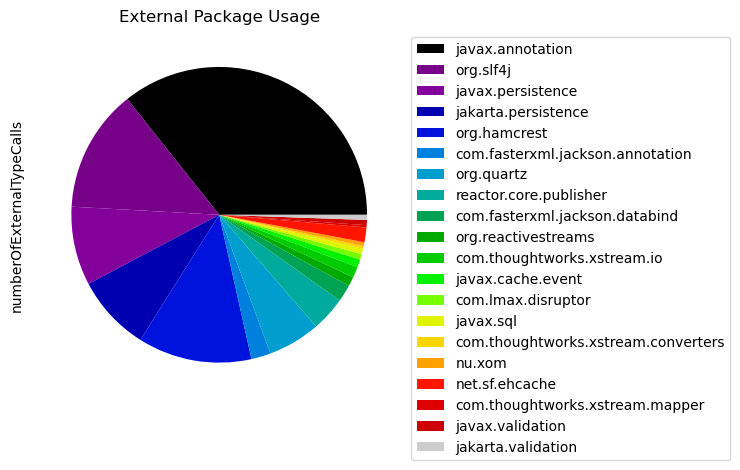

In [9]:
plot.figure();

# Set the name of the index to artifactName
external_package_useage_by_name=external_package_useage.set_index('externalPackageName')

axis = external_package_useage_by_name.head(20).plot(
    y='numberOfExternalTypeCalls', 
    kind='pie',
    title='External Package Usage',
    legend=True,
    labeldistance=None,
    cmap=main_color_map
)
axis.legend(bbox_to_anchor=(1, 1), loc='upper left')
plot.show()

### Table 2 - Top 20 least used external packages overall

- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package

This table identifies external packages that aren't used very often. This could help to find libraries that aren't actually needed or maybe easily replaced. Some of them might be used only in very few spots in the code on purpose and can't be replaced. This needs to be decided on a case-by-case basis.

In [10]:
# Sort by number of external type calls
external_package_least_used=external_package_useage.sort_values(by='numberOfExternalTypeCalls', ascending=True)

# Reset index
external_package_least_used = external_package_least_used.reset_index(drop=True)

# Select columns and only show the first 10 entries (head)
external_package_least_used[['externalPackageName','numberOfExternalTypeCalls']].head(20)


,externalPackageName,numberOfExternalTypeCalls
0,org.junit.rules,1
1,org.junit.jupiter.api,1
2,javax.xml.stream,2
3,org.testcontainers.containers.wait.strategy,2
4,com.fasterxml.jackson.datatype.jsr310,2
5,org.quartz.impl.matchers,2
6,reactor.core,2
7,org.junit.runner,2
8,com.fasterxml.jackson.databind.type,3
9,reactor.util.concurrent,3


### Table 3 - External usage per artifact

- *artifactName* is used to group the the external package usage per artifact for a more detailed analysis.
- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCaller* refers to the distinct types that make use of the external package
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package
- *numberOfTypesInArtifact* represents the total count of all analyzed types for the artifact
- *externalTypeNames* contains a list of actually utilized types of the external package

In [11]:
query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_artifact.cypher")

,artifactName,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfTypesInArtifact,externalTypeNames
0,axon-configuration-4.7.5,javax.annotation,12,104,39,[Nonnull]
1,axon-configuration-4.7.5,org.slf4j,9,28,39,"[LoggerFactory, Logger]"
2,axon-disruptor-4.7.5,org.slf4j,11,20,22,"[Logger, LoggerFactory]"
3,axon-disruptor-4.7.5,com.lmax.disruptor,8,24,22,"[RingBuffer, EventHandler, LifecycleAware, Exc..."
4,axon-disruptor-4.7.5,javax.annotation,5,18,22,[Nonnull]
...,...,...,...,...,...,...
61,axon-test-4.7.5,org.testcontainers.containers.wait.strategy,2,2,85,[Wait]
62,axon-test-4.7.5,org.junit.runners.model,2,8,85,[Statement]
63,axon-test-4.7.5,org.junit.jupiter.api,1,1,85,[Assertions]
64,axon-test-4.7.5,org.junit.rules,1,1,85,[TestRule]


### Table 4 - External usage per artifact and package

In [12]:
external_package_usage_per_package = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_artifact_and_package.cypher")
external_package_usage_per_package

,artifactName,fullPackageName,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfTypesInPackage,externalTypeNames,packageName
0,axon-test-4.7.5,org.axonframework.test.matchers,org.hamcrest,36,180,24,"[Description, Matcher, TypeSafeMatcher, BaseMa...",matchers
1,axon-messaging-4.7.5,org.axonframework.queryhandling,reactor.core.publisher,26,115,40,"[Signal, Flux, Mono, Sinks$Many, FluxSink$Over...",queryhandling
2,axon-messaging-4.7.5,org.axonframework.eventhandling.scheduling.quartz,org.quartz,19,95,6,"[SchedulerContext, Scheduler, JobDataMap, JobD...",quartz
3,axon-messaging-4.7.5,org.axonframework.deadline.quartz,org.quartz,18,131,4,"[JobDataMap, Scheduler, JobDetail, JobExecutio...",quartz
4,axon-messaging-4.7.5,org.axonframework.eventhandling,org.slf4j,15,55,93,"[Logger, LoggerFactory]",eventhandling
...,...,...,...,...,...,...,...,...
118,axon-modelling-4.7.5,org.axonframework.modelling.saga.repository.jdbc,javax.sql,1,2,9,[DataSource],jdbc
119,axon-modelling-4.7.5,org.axonframework.modelling.saga.repository.jpa,javax.persistence,1,2,7,[Index],jpa
120,axon-test-4.7.5,org.axonframework.test.aggregate,org.junit.rules,1,1,19,[TestRule],aggregate
121,axon-test-4.7.5,org.axonframework.test.aggregate,org.junit.runner,1,2,19,[Description],aggregate


### Table 5 - Top 20 external package usage per type

In [13]:
external_package_usage_per_type = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_type.cypher")

external_package_usage_per_type.head(20)

,artifactName,fullPackageName,typeName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfExternalPackages,numberOfExternalTypes,externalPackageNames,externalTypeNames,packageName,fullTypeName
0,axon-messaging-4.7.5,org.axonframework.serialization.json,JacksonSerializer,9,29,6,9,"[com.fasterxml.jackson.databind.module, javax....",[com.fasterxml.jackson.databind.module.SimpleM...,json,org.axonframework.serialization.json.JacksonSe...
1,axon-messaging-4.7.5,org.axonframework.serialization.xml,XStreamSerializer,7,22,5,7,"[org.slf4j, com.thoughtworks.xstream.io.xml, c...","[org.slf4j.Logger, com.thoughtworks.xstream.io...",xml,org.axonframework.serialization.xml.XStreamSer...
2,axon-disruptor-4.7.5,org.axonframework.disruptor.commandhandling,DisruptorCommandBus,6,34,4,6,"[org.slf4j, com.lmax.disruptor.dsl, com.lmax.d...","[org.slf4j.LoggerFactory, com.lmax.disruptor.d...",commandhandling,org.axonframework.disruptor.commandhandling.Di...
3,axon-messaging-4.7.5,org.axonframework.deadline.quartz,QuartzDeadlineManager,13,78,4,13,"[org.quartz, org.slf4j, javax.annotation, org....","[org.quartz.Scheduler, org.slf4j.Logger, org.q...",quartz,org.axonframework.deadline.quartz.QuartzDeadli...
4,axon-messaging-4.7.5,org.axonframework.messaging.responsetypes,MultipleInstancesResponseType,7,17,4,7,"[reactor.core.publisher, com.fasterxml.jackson...","[reactor.core.publisher.Mono, com.fasterxml.ja...",responsetypes,org.axonframework.messaging.responsetypes.Mult...
5,axon-messaging-4.7.5,org.axonframework.queryhandling,SimpleQueryBus,6,55,4,6,"[reactor.core.publisher, javax.annotation, org...","[reactor.core.publisher.Flux, javax.annotation...",queryhandling,org.axonframework.queryhandling.SimpleQueryBus
6,axon-messaging-4.7.5,org.axonframework.queryhandling,SimpleQueryUpdateEmitter,13,33,4,13,"[javax.annotation, org.reactivestreams, reacto...","[javax.annotation.Nonnull, org.reactivestreams...",queryhandling,org.axonframework.queryhandling.SimpleQueryUpd...
7,axon-messaging-4.7.5,org.axonframework.serialization,GapAwareTrackingTokenConverter$ReflectivelyCon...,6,25,4,6,"[com.thoughtworks.xstream.converters, com.thou...",[com.thoughtworks.xstream.converters.Marshalli...,serialization,org.axonframework.serialization.GapAwareTracki...
8,axon-messaging-4.7.5,org.axonframework.serialization,GapAwareTrackingTokenConverter,6,25,4,6,"[com.thoughtworks.xstream.converters, com.thou...",[com.thoughtworks.xstream.converters.Marshalli...,serialization,org.axonframework.serialization.GapAwareTracki...
9,axon-messaging-4.7.5,org.axonframework.serialization,AbstractXStreamSerializer$MetaDataConverter,6,14,4,6,"[com.thoughtworks.xstream.io, com.thoughtworks...",[com.thoughtworks.xstream.io.HierarchicalStrea...,serialization,org.axonframework.serialization.AbstractXStrea...


### Table 6 - External package usage distribution per type

The table shown here only includes the first 20 rows at most which typically represents the most significant entries.
Have a look above to find out which types have the highest external package dependency usage.

In [14]:
external_package_usage_per_type_distribution = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_type_distribution.cypher")
external_package_usage_per_type_distribution[['artifactName', 'artifactTypes', 'numberOfExternalPackages', 'numberOfTypes', 'numberOfTypesPercentage']].head(20)

,artifactName,artifactTypes,numberOfExternalPackages,numberOfTypes,numberOfTypesPercentage
0,axon-configuration-4.7.5,39,1,5,12.820513
1,axon-disruptor-4.7.5,22,1,2,9.090909
2,axon-disruptor-4.7.5,22,2,4,18.181818
3,axon-disruptor-4.7.5,22,3,2,9.090909
4,axon-eventsourcing-4.7.5,130,1,12,9.230769
5,axon-eventsourcing-4.7.5,130,2,3,2.307692
6,axon-eventsourcing-4.7.5,130,3,2,1.538462
7,axon-messaging-4.7.5,729,1,100,13.717421
8,axon-messaging-4.7.5,729,2,29,3.978052
9,axon-messaging-4.7.5,729,3,5,0.685871


In [15]:

# Organize artifacts in columns with the number of types as values using pivot
# Every row represents the number of external packages
external_package_usage_per_type_distribution=external_package_usage_per_type_distribution.pivot(index='numberOfExternalPackages', columns='artifactName', values='numberOfTypesPercentage')

# Fill missing values with zero
external_package_usage_per_type_distribution.fillna(0, inplace=True)

# Convert to integer
# external_package_usage_per_type_distribution=external_package_usage_per_type_distribution.astype(int)

external_package_usage_per_type_distribution.head(10)

artifactName,axon-configuration-4.7.5,axon-disruptor-4.7.5,axon-eventsourcing-4.7.5,axon-messaging-4.7.5,axon-modelling-4.7.5,axon-test-4.7.5
numberOfExternalPackages,,,,,,
1,12.820513,9.090909,9.230769,13.717421,6.711409,30.588235
2,0.000000,18.181818,2.307692,3.978052,2.013423,2.352941
3,0.000000,9.090909,1.538462,0.685871,0.000000,3.529412
4,0.000000,0.000000,0.000000,0.548697,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.274348,0.000000,0.000000


<Figure size 640x480 with 0 Axes>

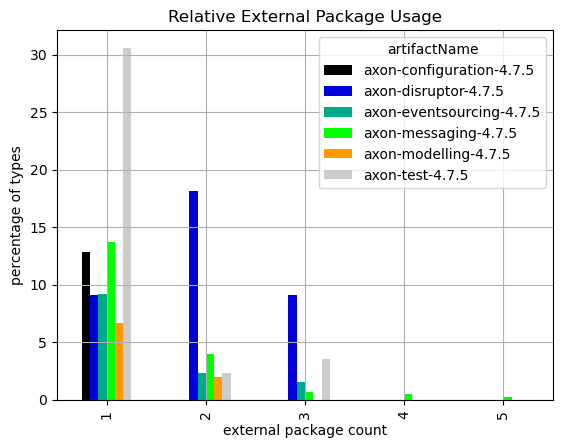

In [16]:
plot.figure();
axes = external_package_usage_per_type_distribution.plot(
    kind='bar', 
    grid=True,
    title='Relative External Package Usage', 
    xlabel='external package count',
    ylabel='percentage of types',
    cmap=main_color_map,
)
plot.show()

## Maven POMs

### Table 7 - Maven POMs and their declared dependencies

In [17]:
query_cypher_to_data_frame("../cypher/External_Dependencies/Maven_POMs_and_their_declared_dependencies.cypher")

,pom.artifactId,pom.name,scope,dependency.optional,dependentArtifact.group,dependentArtifact.name
0,axon-configuration,Axon Framework - Configuration,test,False,org.quartz-scheduler,quartz
1,axon-configuration,Axon Framework - Configuration,test,False,jakarta.persistence,jakarta.persistence-api
2,axon-configuration,Axon Framework - Configuration,test,False,org.hibernate,hibernate-core-jakarta
3,axon-configuration,Axon Framework - Configuration,default,False,${project.groupId},axon-disruptor
4,axon-configuration,Axon Framework - Configuration,test,False,org.hsqldb,hsqldb
...,...,...,...,...,...,...
104,axon-test,Axon Framework - Test Fixtures,provided,False,com.google.code.findbugs,jsr305
105,axon-test,Axon Framework - Test Fixtures,test,False,org.springframework,spring-beans
106,axon-test,Axon Framework - Test Fixtures,default,False,${project.groupId},axon-eventsourcing
107,axon-test,Axon Framework - Test Fixtures,test,False,jakarta.persistence,jakarta.persistence-api
